<a href="https://colab.research.google.com/github/wildlifeai/spyfish_analysis/blob/main/accuracy_analysis_plot_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load r version for notebook

In [1]:
%load_ext rpy2.ipython

# Testing out plots

Here are some potential drafts of plots I thought could illustrate the
accuracy of the citizen science data in a cool way

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




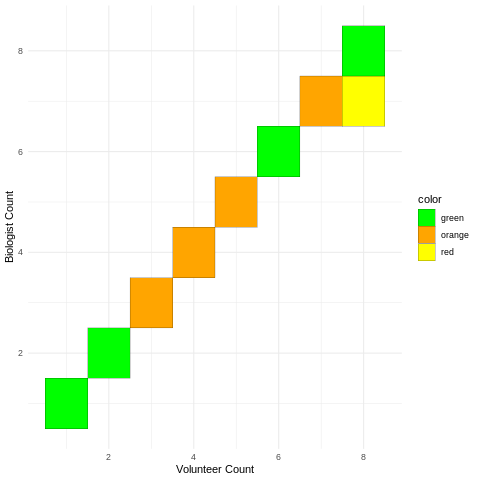

In [2]:
%%R
library(dplyr)
library(ggplot2)

#Made up data to test
df <- data.frame(
  volunteer_count = c(1, 2, 3, 4, 5, 6, 7, 8, 8),
  biologist_count = c(1, 2, 3, 4, 5, 6, 7, 7, 8),
  volunteer_ID = c("blue cod", "snapper", "snapper", "scarlet wrasse", "blue cod", "scarlet wrasse", "snapper", "blue cod", "blue cod"),
  biologist_ID = c("blue cod", "snapper", "scarlet wrasse", "snapper", "scarlet wrasse", "scarlet wrasse", "blue cod", "snapper", "blue cod")
)

#Function to assign color based on conditions
assign_color <- function(df) {
  ifelse(df$volunteer_count == df$biologist_count & df$volunteer_ID == df$biologist_ID, "green",
         ifelse(df$volunteer_count == df$biologist_count, "orange",
                ifelse(df$volunteer_ID == df$biologist_ID, "yellow", "red")))
}

#Create a new column for color assignment
df <- df %>%
  mutate(color = assign_color(.))

# Plot the grid
ggplot(df, aes(x = volunteer_count, y = biologist_count, fill = color)) +
  geom_tile(color = "black") +
  scale_fill_manual(values = c("green", "orange", "yellow", "red")) +
  theme_minimal() +
  labs(x = "Volunteer Count", y = "Biologist Count")


`summarise()` has grouped output by 'volunteer_ID'. You can override using the
`.groups` argument.


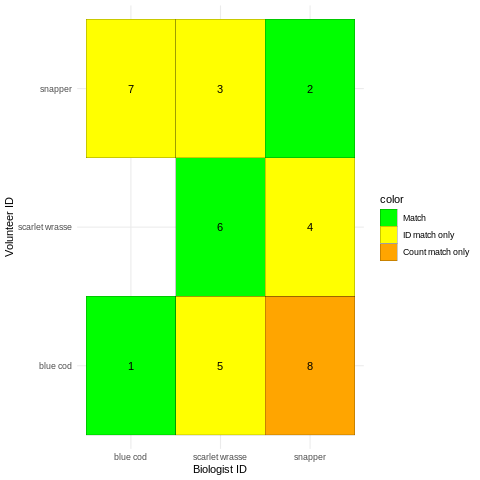

In [3]:
%%R
# Another plot
library(ggplot2)
library(dplyr)
library(tidyr)

#Made up data to test
df <- data.frame(
  volunteer_count = c(1, 2, 3, 4, 5, 6, 7, 8, 8),
  biologist_count = c(1, 2, 3, 4, 5, 6, 7, 7, 8),
  volunteer_ID = c("blue cod", "snapper", "snapper", "scarlet wrasse", "blue cod", "scarlet wrasse", "snapper", "blue cod", "blue cod"),
  biologist_ID = c("blue cod", "snapper", "scarlet wrasse", "snapper", "scarlet wrasse", "scarlet wrasse", "blue cod", "snapper", "blue cod")
)

#Create a grid of the counts
df_grid <- df %>%
  group_by(volunteer_ID, biologist_ID) %>%
  summarize(volunteer_count = first(volunteer_count), biologist_count = first(biologist_count))

#Function to assign color based on conditions
assign_color <- function(df) {
  if (df[["volunteer_count"]] == df[["biologist_count"]] && df[["volunteer_ID"]] == df[["biologist_ID"]]) {
    return("green")
  } else if (df[["volunteer_ID"]] == df[["biologist_ID"]]) {
    return("yellow")
  } else if (df[["volunteer_count"]] == df[["biologist_count"]]) {
    return("orange")
  } else {
    return("red")
  }
}

# Assign color based on conditions
df_grid$color <- apply(df_grid, 1, assign_color)

# Plot the grid
ggplot(df_grid, aes(x = biologist_ID, y = volunteer_ID)) +
  geom_tile(aes(fill = color), color = "black") +
  scale_fill_manual(values = c("green", "yellow", "orange", "red"),
                    labels = c("Match", "ID match only", "Count match only", "Mismatch"),
                    guide = guide_legend()) +
  geom_text(aes(label = volunteer_count), color = "black") +
  theme_minimal() +
  labs(x = "Biologist ID", y = "Volunteer ID")

Hmm but there are a few of each - this would work for one
video/deployment at a time where there wouldn’t be double ups of
species. Could do a big grid of 30 blocks of these for all the videos -
hmm but probs different species. But this kind of plot is good.